# Advanced Classification Predict

©  Explore Data Science Academy

---

### Honour Code

I **EDSA-Team_8**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Climate Change Belief Analysis 2022
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received, Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section the required packages are imported, and briefly discuss, the libraries that will be used throughout the analysis and modelling. |

In [1]:
#importing the required libraries
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
import re

import nltk
# Customise our plotting settings
sns.set_style('whitegrid')
#Libraries for data preparation and model building

# Setting global constants to ensure notebook results are reproducible

 <a id="two"></a>
## 2. Loading Data
<a href=#cont>Back to Table of Contents</a>

We frist start by loading in our dataset, both the `training` and `testing` dataset is loaded as a pandas dataframe

In [2]:
#load the training and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

 <a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

**Exploratory Data Analysis (EDA) :**  After loading in our dataset we first start with the vital component **EDA** to better understand the dataset we are working with and, to gain insight about the `features` and `labels` by performing `Univariate` or `Multivariate` , `Non-graphical` or `Graphical` Analysis"

We take a look quick look at the first few rows of the `training` and `testing` dataset to have an overview of our features and labels, (using `pd.head()` method)

In [3]:
#The first five columns of the traing dataset
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


After taking a look at the frist five  rows of the dataFrame we can see that we have `Three (3)` columns in the dataFrame.

we have two features and one label

features inludes:

    - message
    - tweetid

label:

    - sentiment
    
And the test dataFrame contains only the features

In [4]:
#The first five columns of the test dataset
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


we will take a look at the shape of the dataframe to understand the amount of data we are working with, the **rows** and the **columns**

In [5]:
train.drop(columns = 'tweetid', inplace = True)
test.drop(columns = 'tweetid', inplace = True)



In [6]:
#checking the shape of the traing dataframe
train.shape

(15819, 2)

looking at the shape of the dataframe we have `15819` rows and `3` columns

Next up let's take a look at the data types of the dataFrame using `pd.info()`

In [7]:
#checking the information of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
dtypes: int64(1), object(1)
memory usage: 247.3+ KB


looking at the above output we can see that we have two `int64` and one `object` 

In [8]:
#checking null values in the training data
train.isnull().sum()

sentiment    0
message      0
dtype: int64

well it shows that we have **0** null values in the training data

let's take a closer look on our label `sentiment` 

In [9]:
#checking for unique values 
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Well it looks like we have 4 unique values in our label.

Based on the description of the data here is what each value stands for:

    1 Pro: the tweet supports the belief of man-made climate change
    2 News: the tweet links to factual news about climate change
    0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
    -1 Anti: the tweet does not believe in man-made climate change

let's count and plot the destribution of each unique value

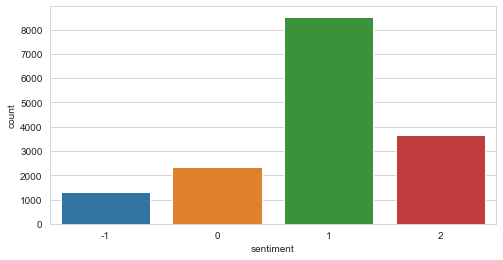

In [10]:
#ploting the destribution of unique label values
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x="sentiment", data=train)
plt.show()

**Interpretation**

- The above plot comfirms that:

`1296` tweets do not believe in man-made climate change `-1`

`2353` tweets neither supports nor refutes the belief of man-made climate change `0`

`8530` Pro: the tweet supports the belief of man-made climate change `1`

`3640` News: the tweet links to factual news about climate change `2`

The plot show that the highest propotion of the tweets supports the belife of man-made climate change

Now moving on let's explore our `features` to gain more insight  

Okay it looks like we don't have a value from the `tweetid`column

Moving on let's take a closer look into the `message` column which contains the tweets

In [11]:
#taking a colser look on the message column
train['message'].head()

0    PolySciMajor EPA chief doesn't think carbon di...
1    It's not like we lack evidence of anthropogeni...
2    RT @RawStory: Researchers say we have three ye...
3    #TodayinMaker# WIRED : 2016 was a pivotal year...
4    RT @SoyNovioDeTodas: It's 2016, and a racist, ...
Name: message, dtype: object

Well based on what we are seeing the `message` column which contains the tweets has some characters, we need to clean the data

**Next setp is Data cleaning**

Before applying any ML model to a set of data we need fisrt check our data to see if the data is in the state data we want it to be or do we need clean the data, well our case we need to clean the data moving on we will start the Data cleaning process

In [12]:
#removes all websites and replaces them with the text 'web-url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [13]:
# Data cleaning 
def clean_data(texts):

        import re
        words = list()
        for text in texts.split():
            
            # remove web Urls
            
            # remove non text character from start and end of string
            text = re.sub(r'(^\W+|\W+$)','',text)
#             # remove multiple white spaces
            text = re.sub(r'\s+','',text)
#             #remove non text characters and emojis between texts
            text = re.sub(r'\W+',r'',text)
#             #remove white space at the end of strings
            text = re.sub(r'\s+$',r'',text)
#             # Remove unwanted symbols
            text = re.sub(r'[#,@,$_,?*//""]',r'',text)
            words.append(text.lower())
            
        text = [i for i in words if len(i) > 2]

        return " ".join(text)

In [14]:
train.head()

,sentiment,message
0,1,PolySciMajor EPA chief doesn't think carbon di...
1,1,It's not like we lack evidence of anthropogeni...
2,2,RT @RawStory: Researchers say we have three ye...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."


In [15]:
train['tweet'] = train['message'].apply(clean_data)
train.head()


,sentiment,message,tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,its not like lack evidence anthropogenic globa...
2,2,RT @RawStory: Researchers say we have three ye...,rawstory researchers say have three years act ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was pivotal year the w...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",soynoviodetodas its 2016 and racist sexist cli...


In [16]:
train.tweet[1500]

'chucknellis the climate change scam revealed urlweb'

In [17]:
train.message[1500]

'RT @ChuckNellis: The climate change SCAM, revealed! url-web'

In [18]:
train.message[3400]

"Was weirdly shamed about talking about global warming in front of my 6 year old. Uh...she's gonna find out lady! 🔥 🌏"

In [19]:
train.tweet[3400]

'was weirdly shamed about talking about global warming front year old uhshes gonna find out lady'

In [20]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
train['tokens'] = train['tweet'].apply(tokeniser.tokenize)

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
def extract_lemma(words, lemmatizer):
    return ' '.join([lemmatizer.lemmatize(word) for word in words])   

In [23]:
train['lemma'] = train['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [24]:
train.head()

,sentiment,message,tweet,tokens,lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,its not like lack evidence anthropogenic globa...,"[its, not, like, lack, evidence, anthropogenic...",it not like lack evidence anthropogenic global...
2,2,RT @RawStory: Researchers say we have three ye...,rawstory researchers say have three years act ...,"[rawstory, researchers, say, have, three, year...",rawstory researcher say have three year act cl...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,todayinmaker wired 2016 was pivotal year the w...,"[todayinmaker, wired, 2016, was, pivotal, year...",todayinmaker wired 2016 wa pivotal year the wa...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",soynoviodetodas its 2016 and racist sexist cli...,"[soynoviodetodas, its, 2016, and, racist, sexi...",soynoviodetodas it 2016 and racist sexist clim...


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vect = CountVectorizer(stop_words='english',analyzer='word', ngram_range=(1, 1))
X = vect.fit_transform(train['lemma'].values.astype(str))
X

<15819x22769 sparse matrix of type '<class 'numpy.int64'>'
	with 169021 stored elements in Compressed Sparse Row format>

In [27]:
my_dict = vect.vocabulary_

In [28]:
total = sum([v for v in my_dict.values()])
total

259202296

In [29]:
y = train["sentiment"]

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [32]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
pred = forest.predict(X_test)

In [34]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred, average = 'weighted')

In [35]:
f1

0.6947483876490883

In [36]:
test = pd.read_csv('test.csv')
test

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
...,...,...
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455


In [37]:
#removes all websites and replaces them with the text 'web-url'
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
test['message'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [38]:
test['tweet'] = test['message'].apply(clean_data)
test.head()

,message,tweetid,tweet
0,Europe will now be looking to China to make su...,169760,europe will now looking china make sure that n...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling staffers climate...
2,"The scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263,karoli morgfair osborneink dailykos putin got ...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,fakewillmoore female orgasms cause global warm...


In [39]:
test['tokens'] = test['tweet'].apply(tokeniser.tokenize)

In [40]:
test['lemma'] = test['tokens'].apply(extract_lemma, args=(lemmatizer, ))

In [41]:
test_X = vect.transform(test['lemma'].values.astype(str))

In [42]:
y_pred = forest.predict(test_X)
len(y_pred)

10546

In [43]:
test = test[['tweetid']]
test['sentiment'] = y_pred


<ipython-input-43-73614b45831f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sentiment'] = y_pred


In [44]:
tweet = test['tweetid'] 
tweet

0        169760
1         35326
2        224985
3        476263
4        872928
          ...  
10541    895714
10542    875167
10543     78329
10544    867455
10545    470892
Name: tweetid, Length: 10546, dtype: int64

In [45]:
sub_df = pd.DataFrame(list(zip(tweet,  y_pred)), columns = ['tweetid', 'sentiment'])
sub_df.head()

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [46]:
sub_df.to_csv('sub_rf.csv', index_label = False, index = False)

In [47]:
sub_df

,tweetid,sentiment
0,169760,2
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


In [48]:
#Data preprocessing

In [49]:
# Determine our Label

In [50]:
# Split Data (into Training & Test)

 <a id="four"></a>
## 4. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Extraxt features to help predict the label 
# Bag-of-words vectors built into sklearn

 <a id="five"></a>
## 5. Modeling
<a href=#cont>Back to Table of Contents</a>

 <a id="six"></a>
## 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Evaluate trained model using the test set

 <a id="seven"></a>
## 7. Model Explanations
<a href=#cont>Back to Table of Contents</a>